In [1]:
##### Libraries ####
import seaborn as sns
import scipy
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
##### load training dataset ######
data =  pd.read_csv('dataraning_new_data.csv', delimiter=',') #('training_data.csv', delimiter=',')
data.head()

Unnamed: 0  Resp  VL.t0  CD4.t0  rtlength  pr_A  pr_C  pr_G  pr_R  pr_T  \
0           1     0    4.3     145      1005   104    51    67     2    71   
1           2     0    3.6     224       909   110    49    65    73     0   
2           3     0    3.2    1017       903   105    47    67     2    74   
3           4     0    5.7     206      1455   105    49    71     1    71   
4           5     0    3.5     572       903   105    50    69    73     0   

   pr_Y     PR_GC  RT_A  RT_C  RT_G  RT_R  RT_T  RT_Y     RT_GC  
0     2  0.402730   402   167   210     1     1     1  0.378134  
1     0  0.383838   355   151   193     1     3   203  0.381375  
2     2  0.389078   360   146   181     1     7   201  0.368243  
3     0  0.405405   586   245   305     1     1   317  0.378527  
4     0  0.400673   353   150   184     2     5     1  0.374439

In [3]:
####### Number of missing data ########
data.isnull().sum().sum()

0

In [4]:
data.isnull().sum()

Unnamed: 0    0
Resp          0
VL.t0         0
CD4.t0        0
rtlength      0
pr_A          0
pr_C          0
pr_G          0
pr_R          0
pr_T          0
pr_Y          0
PR_GC         0
RT_A          0
RT_C          0
RT_G          0
RT_R          0
RT_T          0
RT_Y          0
RT_GC         0
dtype: int64

In [5]:
data_X = data[['VL.t0','CD4.t0', 'rtlength', 'pr_A', 'pr_C','pr_G', 'pr_R', 'pr_T','pr_Y','PR_GC','RT_A', 'RT_C', 
                  'RT_G', 'RT_R', 'RT_T', 'RT_Y', 'RT_GC']]
# data_X = data[['VL-t0', 'CD4-t0']]

In [6]:
# descriptive statistic
data.describe()


Unnamed: 0        Resp       VL.t0       CD4.t0     rtlength  \
count  920.000000  920.000000  920.000000   920.000000   920.000000   
mean   460.500000    0.203261    4.315054   272.990217   958.850000   
std    265.725422    0.402644    0.702710   199.699935   207.025358   
min      1.000000    0.000000    2.800000     0.000000   579.000000   
25%    230.750000    0.000000    3.775000   124.500000   872.250000   
50%    460.500000    0.000000    4.300000   243.000000   903.000000   
75%    690.250000    0.000000    4.800000   379.000000   972.000000   
max    920.000000    1.000000    6.000000  1589.000000  1482.000000   

             pr_A        pr_C        pr_G        pr_R        pr_T        pr_Y  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean   105.532609   47.208696   67.063043   21.679348   33.289130   16.883696   
std      2.861896    3.030841    4.991434   32.298668   35.849235   30.304199   
min     80.000000    1.000000    1.000000    1.000000    0.000000    0.000000   
25%    104.000000   46.000000   66.000000    1.000000    1.000000    0.000000   
50%    106.000000   47.000000   67.000000    2.000000    3.000000    1.000000   
75%    107.000000   49.000000   69.000000   71.000000   73.000000    3.000000   
max    114.000000   54.000000   74.000000   79.000000   79.000000   78.000000   

            PR_GC        RT_A        RT_C        RT_G        RT_R        RT_T  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean     0.390473  379.334783  157.268478  196.441304   22.046739   63.669565   
std      0.009618   82.592270   35.595367   46.932323   60.044950   94.248875   
min      0.356589  220.000000    1.000000    1.000000    1.000000    0.000000   
25%      0.383838  342.000000  141.000000  178.000000    1.000000    1.000000   
50%      0.390572  357.000000  149.000000  186.000000    1.000000    3.000000   
75%      0.397260  389.250000  160.000000  202.000000    3.000000  179.000000   
max      0.419244  597.000000  255.000000  321.000000  307.000000  326.000000   

             RT_Y       RT_GC  
count  920.000000  920.000000  
mean    73.039130    0.373724  
std    102.551341    0.005879  
min      0.000000    0.353434  
25%      1.000000    0.369731  
50%      3.000000    0.373608  
75%    198.000000    0.377752  
max    323.000000    0.390828

In [7]:
################ mean of data_X ############
data_X.mean()

VL.t0         4.315054
CD4.t0      272.990217
rtlength    958.850000
pr_A        105.532609
pr_C         47.208696
pr_G         67.063043
pr_R         21.679348
pr_T         33.289130
pr_Y         16.883696
PR_GC         0.390473
RT_A        379.334783
RT_C        157.268478
RT_G        196.441304
RT_R         22.046739
RT_T         63.669565
RT_Y         73.039130
RT_GC         0.373724
dtype: float64

In [8]:
################ covariance matrix of data_X ############
data_X.cov()

VL.t0        CD4.t0      rtlength       pr_A       pr_C  \
VL.t0      0.493802    -59.960897     47.648615  -0.020812  -0.024799   
CD4.t0   -59.960897  39880.064104 -12287.240860 -13.098157  26.903023   
rtlength  47.648615 -12287.240860  42859.498694   2.737214   0.835473   
pr_A      -0.020812    -13.098157      2.737214   8.190448   1.434972   
pr_C      -0.024799     26.903023      0.835473   1.434972   9.185996   
pr_G       0.044371     40.905949     19.400109  -1.767020   2.390528   
pr_R      -2.263176    555.458231   -866.200490  22.507203   6.072432   
pr_T       1.587971   -172.645699    337.204461   0.005796  -2.690439   
pr_Y       0.401372   -268.330845    618.768172 -16.377596  -4.931088   
PR_GC     -0.000271      0.115299     -0.020479  -0.013627   0.016107   
RT_A      18.848437  -4821.550584  17063.449619   2.610399   1.585116   
RT_C       7.489534  -1961.717719   6918.907563   0.931932   1.654464   
RT_G       9.895580  -2526.608301   9173.250163   1.557955   1.437725   
RT_R      -3.597168    762.869881  -1120.575136  16.773773 -11.640886   
RT_T      -5.349046   1102.215480  -1494.726442   6.088045  14.428121   
RT_Y       5.954633  -1108.643795   2908.395430 -12.875053  -4.508719   
RT_GC      0.000248     -0.119458      0.590519  -0.000399   0.000209   

               pr_G         pr_R         pr_T        pr_Y         PR_GC  \
VL.t0      0.044371    -2.263176     1.587971    0.401372 -2.705544e-04   
CD4.t0    40.905949   555.458231  -172.645699 -268.330845  1.152993e-01   
rtlength  19.400109  -866.200490   337.204461  618.768172 -2.047922e-02   
pr_A      -1.767020    22.507203     0.005796  -16.377596 -1.362661e-02   
pr_C       2.390528     6.072432    -2.690439   -4.931088  1.610732e-02   
pr_G      24.914411    -4.000438    -1.256550   -3.469265  1.684835e-02   
pr_R      -4.000438  1043.203926  -647.723293 -334.195114 -6.072647e-03   
pr_T      -1.256550  -647.723293  1285.167673 -499.453823 -1.880649e-02   
pr_Y      -3.469265  -334.195114  -499.453823  918.344456  1.641080e-02   
PR_GC      0.016848    -0.006073    -0.018806    0.016411  9.249755e-05   
RT_A       8.430449  -324.060108   139.493958  223.577608 -6.147480e-03   
RT_C       3.444427  -110.618932    74.356458   62.289148  1.480688e-03   
RT_G       3.347556  -151.995446    47.991962  124.124287 -6.435662e-03   
RT_R       9.406191   365.642860  -177.318207 -165.375407 -4.726315e-02   
RT_T      -3.003085   270.467379  -170.351583 -120.212575  4.123133e-02   
RT_Y      -1.905625  -316.112575   198.258532   85.760813  4.742092e-03   
RT_GC      0.000843    -0.003642    -0.005632    0.014674 -2.902897e-08   

                  RT_A         RT_C         RT_G         RT_R         RT_T  \
VL.t0        18.848437     7.489534     9.895580    -3.597168    -5.349046   
CD4.t0    -4821.550584 -1961.717719 -2526.608301   762.869881  1102.215480   
rtlength  17063.449619  6918.907563  9173.250163 -1120.575136 -1494.726442   
pr_A          2.610399     0.931932     1.557955    16.773773     6.088045   
pr_C          1.585116     1.654464     1.437725   -11.640886    14.428121   
pr_G          8.430449     3.444427     3.347556     9.406191    -3.003085   
pr_R       -324.060108  -110.618932  -151.995446   365.642860   270.467379   
pr_T        139.493958    74.356458    47.991962  -177.318207  -170.351583   
pr_Y        223.577608    62.289148   124.124287  -165.375407  -120.212575   
PR_GC        -0.006147     0.001481    -0.006436    -0.047263     0.041231   
RT_A       6821.483011  2757.742447  3648.021848  -377.685958  -515.166731   
RT_C       2757.742447  1267.030126  1515.335145  -317.527252  -159.179959   
RT_G       3648.021848  1515.335145  2202.642906  -470.846546  -224.758263   
RT_R       -377.685958  -317.527252  -470.846546  3605.396072 -1190.782145   
RT_T       -515.166731  -159.179959  -224.758263 -1190.782145  8882.850433   
RT_Y       1128.032587   537.819733   691.752027 -1435.987685 -4248.408166   
RT_GC         0.221094

In [9]:
################ correlation matrix of data_X ############
#data[['VL-t0', 'CD4-t0']].corr()
data_X.corr()

VL.t0    CD4.t0  rtlength      pr_A      pr_C      pr_G  \
VL.t0     1.000000 -0.427281  0.327529 -0.010349 -0.011644  0.012650   
CD4.t0   -0.427281  1.000000 -0.297203 -0.022918  0.044449  0.041038   
rtlength  0.327529 -0.297203  1.000000  0.004620  0.001332  0.018774   
pr_A     -0.010349 -0.022918  0.004620  1.000000  0.165435 -0.123698   
pr_C     -0.011644  0.044449  0.001332  0.165435  1.000000  0.158018   
pr_G      0.012650  0.041038  0.018774 -0.123698  0.158018  1.000000   
pr_R     -0.099714  0.086117 -0.129542  0.243491  0.062032 -0.024814   
pr_T      0.063036 -0.024116  0.045435  0.000056 -0.024762 -0.007022   
pr_Y      0.018848 -0.044339  0.098628 -0.188840 -0.053688 -0.022936   
PR_GC    -0.040033  0.060032 -0.010285 -0.495073  0.552580  0.350968   
RT_A      0.324758 -0.292327  0.997939  0.011044  0.006332  0.020450   
RT_C      0.299423 -0.275972  0.938903  0.009148  0.015336  0.019386   
RT_G      0.300049 -0.269580  0.944121  0.011599  0.010107  0.014290   
RT_R     -0.085253  0.063620 -0.090145  0.097611 -0.063966  0.031384   
RT_T     -0.080765  0.058562 -0.076606  0.022571  0.050509 -0.006384   
RT_Y      0.082630 -0.054134  0.136990 -0.043869 -0.014506 -0.003723   
RT_GC     0.060104 -0.101756  0.485215 -0.023715  0.011730  0.028718   

              pr_R      pr_T      pr_Y     PR_GC      RT_A      RT_C  \
VL.t0    -0.099714  0.063036  0.018848 -0.040033  0.324758  0.299423   
CD4.t0    0.086117 -0.024116 -0.044339  0.060032 -0.292327 -0.275972   
rtlength -0.129542  0.045435  0.098628 -0.010285  0.997939  0.938903   
pr_A      0.243491  0.000056 -0.188840 -0.495073  0.011044  0.009148   
pr_C      0.062032 -0.024762 -0.053688  0.552580  0.006332  0.015336   
pr_G     -0.024814 -0.007022 -0.022936  0.350968  0.020450  0.019386   
pr_R      1.000000 -0.559403 -0.341439 -0.019549 -0.121479 -0.096217   
pr_T     -0.559403  1.000000 -0.459740 -0.054546  0.047112  0.058270   
pr_Y     -0.341439 -0.459740  1.000000  0.056307  0.089328  0.057745   
PR_GC    -0.019549 -0.054546  0.056307  1.000000 -0.007739  0.004325   
RT_A     -0.121479  0.047112  0.089328 -0.007739  1.000000  0.938039   
RT_C     -0.096217  0.058270  0.057745  0.004325  0.938039  1.000000   
RT_G     -0.100271  0.028524  0.087273 -0.014258  0.941122  0.907075   
RT_R      0.188537 -0.082375 -0.090885 -0.081843 -0.076158 -0.148563   
RT_T      0.088849 -0.050419 -0.042089  0.045487 -0.066181 -0.047448   
RT_Y     -0.095437  0.053928  0.027596  0.004808  0.133181  0.147334   
RT_GC    -0.019180 -0.026724  0.082371 -0.000513  0.455368  0.514687   

              RT_G      RT_R      RT_T      RT_Y     RT_GC  
VL.t0     0.300049 -0.085253 -0.080765  0.082630  0.060104  
CD4.t0   -0.269580  0.063620  0.058562 -0.054134 -0.101756  
rtlength  0.944121 -0.090145 -0.076606  0.136990  0.485215  
pr_A      0.011599  0.097611  0.022571 -0.043869 -0.023715  
pr_C      0.010107 -0.063966  0.050509 -0.014506  0.011730  
pr_G      0.014290  0.031384 -0.006384 -0.003723  0.028718  
pr_R     -0.100271  0.188537  0.088849 -0.095437 -0.019180  
pr_T      0.028524 -0.082375 -0.050419  0.053928 -0.026724  
pr_Y      0.087273 -0.090885 -0.042089  0.027596  0.082371  
PR_GC    -0.014258 -0.081843  0.045487  0.004808 -0.000513  
RT_A      0.941122 -0.076158 -0.066181  0.133181  0.455368  
RT_C      0.907075 -0.148563 -0.047448  0.147334  0.514687  
RT_G      1.000000 -0.167082 -0.050812  0.143727  0.499224  
RT_R     -0.167082  1.000000 -0.210416 -0.233202 -0.085303  
RT_T     -0.050812 -0.210416  1.000000 -0.439550 -0.010580  
RT_Y      0.143727 -0.233202 -0.439550  1.000000  0.103095  
RT_GC     0.499224 -0.085303 -0.010580  0.103095  1.000000

## Class 0: no improvement

In [10]:
class_0 = data[data['Resp']==0]

In [11]:
class_0_X = class_0[['VL.t0','CD4.t0', 'rtlength', 'pr_A', 'pr_C','pr_G', 'pr_R', 'pr_T','pr_Y','PR_GC','RT_A', 'RT_C', 
                  'RT_G', 'RT_R', 'RT_T', 'RT_Y', 'RT_GC']]

## Class 1: improvement

In [12]:
class_1 = data[data['Resp']==1]

In [13]:
class_1_X = class_1[['VL.t0','CD4.t0', 'rtlength', 'pr_A', 'pr_C','pr_G', 'pr_R', 'pr_T','pr_Y','PR_GC','RT_A', 'RT_C', 
                  'RT_G', 'RT_R', 'RT_T', 'RT_Y', 'RT_GC']]

## 1) Descriptive Statistic

In [14]:
class_0_X.describe()

VL.t0       CD4.t0     rtlength        pr_A        pr_C  \
count  733.000000   733.000000   733.000000  733.000000  733.000000   
mean     4.185948   285.848568   925.396999  105.708049   47.331514   
std      0.675347   194.876135   168.868411    2.756394    2.975410   
min      2.800000     1.000000   579.000000   91.000000    1.000000   
25%      3.700000   139.000000   864.000000  104.000000   46.000000   
50%      4.100000   253.000000   900.000000  106.000000   47.000000   
75%      4.600000   390.000000   909.000000  107.000000   49.000000   
max      6.000000  1219.000000  1482.000000  114.000000   53.000000   

             pr_G        pr_R        pr_T        pr_Y       PR_GC        RT_A  \
count  733.000000  733.000000  733.000000  733.000000  733.000000  733.000000   
mean    67.140518   23.420191   32.448840   16.050477    0.390617  366.173261   
std      4.849445   33.142567   35.852638   29.786332    0.009548   67.672922   
min      1.000000    1.000000    0.000000    0.000000    0.360269  220.000000   
25%     66.000000    1.000000    1.000000    0.000000    0.383838  337.000000   
50%     67.000000    2.000000    3.000000    1.000000    0.390572  356.000000   
75%     69.000000   72.000000   73.000000    2.000000    0.397306  364.000000   
max     74.000000   79.000000   79.000000   78.000000    0.419244  595.000000   

             RT_C        RT_G        RT_R        RT_T        RT_Y       RT_GC  
count  733.000000  733.000000  733.000000  733.000000  733.000000  733.000000  
mean   151.976808  190.064120   23.412005   69.300136   69.407913    0.373410  
std     29.415216   37.845819   61.374996   95.515069   98.365946    0.005656  
min      1.000000    1.000000    1.000000    0.000000    0.000000    0.358108  
25%    140.000000  177.000000    1.000000    1.000000    1.000000    0.369589  
50%    148.000000  185.000000    2.000000    4.000000    3.000000    0.373303  
75%    153.000000  191.000000    3.000000  197.000000  195.000000    0.377212  
max    255.000000  321.000000  243.000000  326.000000  323.000000    0.390828

In [15]:
class_1_X.describe()

VL.t0       CD4.t0     rtlength        pr_A        pr_C  \
count  187.000000   187.000000   187.000000  187.000000  187.000000   
mean     4.821123   222.588235  1089.978610  104.844920   46.727273   
std      0.567176   210.664454   278.996453    3.157601    3.202058   
min      2.900000     0.000000   597.000000   80.000000   28.000000   
25%      4.400000    77.000000   900.000000  103.000000   46.000000   
50%      4.800000   170.000000   909.000000  105.000000   47.000000   
75%      5.300000   315.000000  1453.500000  107.000000   48.000000   
max      5.900000  1589.000000  1476.000000  110.000000   54.000000   

             pr_G        pr_R        pr_T        pr_Y       PR_GC        RT_A  \
count  187.000000  187.000000  187.000000  187.000000  187.000000  187.000000   
mean    66.759358   14.855615   36.582888   20.149733    0.389908  430.925134   
std      5.516433   27.797763   35.741114   32.129259    0.009890  111.006416   
min      1.000000    1.000000    0.000000    0.000000    0.356589  244.000000   
25%     66.000000    1.000000    2.000000    0.000000    0.383562  352.000000   
50%     67.000000    2.000000    5.000000    1.000000    0.391003  366.000000   
75%     69.000000    4.000000   73.000000   71.000000    0.395547  573.000000   
max     73.000000   77.000000   76.000000   75.000000    0.413559  597.000000   

             RT_C        RT_G        RT_R        RT_T        RT_Y       RT_GC  
count  187.000000  187.000000  187.000000  187.000000  187.000000  187.000000  
mean   178.010695  221.438503   16.695187   41.598930   87.272727    0.374955  
std     48.084490   66.765600   54.342286   85.850612  116.735136    0.006551  
min      1.000000    1.000000    1.000000    0.000000    0.000000    0.353434  
25%    144.000000  180.500000    1.000000    1.000000    1.000000    0.370391  
50%    153.000000  190.000000    1.000000    3.000000    8.000000    0.375431  
75%    237.000000  301.500000    3.000000   10.000000  203.000000    0.379749  
max    250.000000  318.000000  307.000000  322.000000  319.000000    0.389168

## 2) Covariance matrix

In [16]:
class_0_X.cov()

VL.t0        CD4.t0      rtlength       pr_A       pr_C  \
VL.t0      0.456093    -61.542978     26.913236   0.112354   0.033285   
CD4.t0   -61.542978  37976.707911  -6700.453461 -19.247823  36.932784   
rtlength  26.913236  -6700.453461  28516.540264   5.782729  -7.282064   
pr_A       0.112354    -19.247823      5.782729   7.597708   0.741727   
pr_C       0.033285     36.932784     -7.282064   0.741727   8.853063   
pr_G       0.046444     37.480325     12.076652  -2.883783   1.977943   
pr_R      -1.261574    418.698963   -461.761305  24.381039   4.282642   
pr_T       1.304813    -45.839042     96.148070  -2.428891  -1.297907   
pr_Y      -0.319645   -264.124859    331.542775 -15.979778  -6.366484   
PR_GC     -0.000229      0.135027     -0.041979  -0.015859   0.014243   
RT_A      10.658585  -2585.017443  11394.321832   3.934532  -1.901779   
RT_C       4.312652  -1062.693408   4647.114411   2.352509  -0.236836   
RT_G       5.676585  -1427.572244   6272.105657   1.315194  -0.738499   
RT_R      -3.419886    575.574771   -903.430182  26.198319  -9.004259   
RT_T      -3.033208   1539.102890   -610.820136   2.951133  11.374408   
RT_Y       4.273841  -1239.703172   1872.158876 -20.036485  -7.304813   
RT_GC      0.000007     -0.044136      0.397605  -0.000562   0.000093   

               pr_G         pr_R         pr_T        pr_Y         PR_GC  \
VL.t0      0.046444    -1.261574     1.304813   -0.319645 -2.287467e-04   
CD4.t0    37.480325   418.698963   -45.839042 -264.124859  1.350273e-01   
rtlength  12.076652  -461.761305    96.148070  331.542775 -4.197929e-02   
pr_A      -2.883783    24.381039    -2.428891  -15.979778 -1.585858e-02   
pr_C       1.977943     4.282642    -1.297907   -6.366484  1.424329e-02   
pr_G      23.517113    -2.721694    -2.828184   -7.165573  1.707008e-02   
pr_R      -2.721694  1098.429756  -688.239403 -342.961130 -1.219124e-02   
pr_T      -2.828184  -688.239403  1285.411655 -463.779518 -1.207387e-02   
pr_Y      -7.165573  -342.961130  -463.779518  887.225591  1.100970e-02   
PR_GC      0.017070    -0.012191    -0.012074    0.011010  9.117204e-05   
RT_A       5.388189  -160.796946    41.010925  109.189330 -1.625856e-02   
RT_C       1.844793   -46.043520    29.648402   25.875489 -5.765858e-03   
RT_G       3.503273   -82.906761     6.939760   73.498125 -8.072220e-03   
RT_R       9.443393   389.430468  -170.144194 -200.854159 -5.784675e-02   
RT_T       6.782904   235.578631  -159.761947 -121.649051  3.106935e-02   
RT_Y      -1.928982  -294.612892   140.293438  156.252606  3.013796e-02   
RT_GC      0.000961    -0.001189    -0.009547    0.013528  3.461922e-08   

                  RT_A         RT_C         RT_G         RT_R         RT_T  \
VL.t0        10.658585     4.312652     5.676585    -3.419886    -3.033208   
CD4.t0    -2585.017443 -1062.693408 -1427.572244   575.574771  1539.102890   
rtlength  11394.321832  4647.114411  6272.105657  -903.430182  -610.820136   
pr_A          3.934532     2.352509     1.315194    26.198319     2.951133   
pr_C         -1.901779    -0.236836    -0.738499    -9.004259    11.374408   
pr_G          5.388189     1.844793     3.503273     9.443393     6.782904   
pr_R       -160.796946   -46.043520   -82.906761   389.430468   235.578631   
pr_T         41.010925    29.648402     6.939760  -170.144194  -159.761947   
pr_Y        109.189330    25.875489    73.498125  -200.854159  -121.649051   
PR_GC        -0.016259    -0.005766    -0.008072    -0.057847     0.031069   
RT_A       4579.624311  1857.372876  2498.615925  -277.403449  -170.855352   
RT_C       1857.372876   865.254926  1046.780178  -231.019120   -20.126909   
RT_G       2498.615925  1046.780178  1432.305992  -242.004596   -82.291129   
RT_R       -277.403449  -231.019120  -242.004596  3766.890129 -1402.138854   
RT_T       -170.855352   -20.126909   -82.291129 -1402.138854  9123.128374   
RT_Y        691.561742   353.747178   409.173262 -1470.720204 -4446.253744   
RT_GC         0.144878

In [17]:
class_1_X.cov()

VL.t0        CD4.t0      rtlength        pr_A        pr_C  \
VL.t0      0.321689    -21.870825     45.771153   -0.105846    0.053910   
CD4.t0   -21.870825  44379.512334 -26000.175522  -32.703985  -43.043011   
rtlength  45.771153 -26000.175522  77839.021045  104.555805  112.445748   
pr_A      -0.105846    -32.703985    104.555805    9.970444    3.753177   
pr_C       0.053910    -43.043011    112.445748    3.753177   10.253177   
pr_G       0.230379     35.292853     98.575470    2.354954    3.842620   
pr_R      -1.859568    662.666034  -1333.422460    9.332327    9.003421   
pr_T       0.607514   -463.135041    742.684578   12.445719   -6.184262   
pr_Y       1.155422    -78.604681   1212.046231  -15.197085    2.675464   
PR_GC     -0.000076      0.002386      0.157406   -0.005406    0.023187   
RT_A      18.235730 -10368.143896  30929.476885   42.181876   46.656891   
RT_C       6.786601  -4191.146110  12464.570122   13.345754   21.707234   
RT_G      10.589612  -5275.598039  16503.778247   24.213530   25.195503   
RT_R      -0.896753   1163.707147  -1095.667845  -24.870105  -25.330890   
RT_T      -0.397665  -2014.924099  -1329.411851   -0.686188   13.115836   
RT_Y       3.511950    306.440860   4646.941349   27.590909   15.117791   
RT_GC      0.000413     -0.338223      1.149179    0.001310    0.001414   

               pr_G         pr_R         pr_T         pr_Y         PR_GC  \
VL.t0      0.230379    -1.859568     0.607514     1.155422 -7.614888e-05   
CD4.t0    35.292853   662.666034  -463.135041   -78.604681  2.386499e-03   
rtlength  98.575470 -1333.422460   742.684578  1212.046231  1.574063e-01   
pr_A       2.354954     9.332327    12.445719   -15.197085 -5.405709e-03   
pr_C       3.842620     9.003421    -6.184262     2.675464  2.318697e-02   
pr_G      30.431028   -11.669340     6.184032    12.310419  1.585005e-02   
pr_R     -11.669340   772.715600  -463.393882  -273.370738  1.311486e-02   
pr_T       6.184032  -463.393882  1277.427232  -656.109252 -4.305809e-02   
pr_Y      12.310419  -273.370738  -656.109252  1032.289288  4.008084e-02   
PR_GC      0.015850     0.013115    -0.043058     0.040081  9.780946e-05   
RT_A      40.218446  -524.096889   313.398712   462.333851  7.035122e-02   
RT_C      17.706889  -186.745759   164.493732   120.444627  4.477876e-02   
RT_G      12.331896  -209.468604   105.915071   221.009258  1.777200e-02   
RT_R       7.259588   227.912742  -184.262233    -4.583146 -9.676766e-03   
RT_T     -49.989506   219.183716  -121.211201   -24.246076  6.572784e-02   
RT_Y       3.630499  -279.863636   368.286413  -249.858260 -8.504105e-02   
RT_GC      0.000854    -0.002713     0.004629     0.014191  5.971298e-07   

                  RT_A          RT_C          RT_G         RT_R         RT_T  \
VL.t0        18.235730      6.786601     10.589612    -0.896753    -0.397665   
CD4.t0   -10368.143896  -4191.146110  -5275.598039  1163.707147 -2014.924099   
rtlength  30929.476885  12464.570122  16503.778247 -1095.667845 -1329.411851   
pr_A         42.181876     13.345754     24.213530   -24.870105    -0.686188   
pr_C         46.656891     21.707234     25.195503   -25.330890    13.115836   
pr_G         40.218446     17.706889     12.331896     7.259588   -49.989506   
pr_R       -524.096889   -186.745759   -209.468604   227.912742   219.183716   
pr_T        313.398712    164.493732    105.915071  -184.262233  -121.211201   
pr_Y        462.333851    120.444627    221.009258    -4.583146   -24.246076   
PR_GC         0.070351      0.044779      0.017772    -0.009677     0.065728   
RT_A      12322.424472   4965.640590   6563.785694  -425.990685  -436.169973   
RT_C       4965.640590   2312.118165   2713.199586  -519.615002  -129.603214   
RT_G       6563.785694   2713.199586   4457.645391 -1205.177448   -90.468346   
RT_R       -425.990685   -519.615002  -1205.177448  2953.084009  -514.434736   
RT_T       -436.169973   -129.603214    -90.468346  -514.434736  7370.327526   
RT_Y       192

## 3) Correlation

In [18]:
class_0_X.corr()

VL.t0    CD4.t0  rtlength      pr_A      pr_C      pr_G  \
VL.t0     1.000000 -0.467620  0.235988  0.060356  0.016564  0.014181   
CD4.t0   -0.467620  1.000000 -0.203609 -0.035833  0.063695  0.039660   
rtlength  0.235988 -0.203609  1.000000  0.012423 -0.014493  0.014747   
pr_A      0.060356 -0.035833  0.012423  1.000000  0.090439 -0.215739   
pr_C      0.016564  0.063695 -0.014493  0.090439  1.000000  0.137080   
pr_G      0.014181  0.039660  0.014747 -0.215739  0.137080  1.000000   
pr_R     -0.056364  0.064827 -0.082506  0.266885  0.043429 -0.016934   
pr_T      0.053889 -0.006561  0.015881 -0.024578 -0.012167 -0.016267   
pr_Y     -0.015890 -0.045502  0.065913 -0.194631 -0.071835 -0.049607   
PR_GC    -0.035473  0.072566 -0.026035 -0.602549  0.501340  0.368649   
RT_A      0.233216 -0.196015  0.997069  0.021093 -0.009445  0.016419   
RT_C      0.217093 -0.185386  0.935541  0.029015 -0.002706  0.012933   
RT_G      0.222097 -0.193563  0.981402  0.012608 -0.006558  0.019088   
RT_R     -0.082507  0.048123 -0.087168  0.154860 -0.049307  0.031728   
RT_T     -0.047022  0.082687 -0.037870  0.011209  0.040023  0.014644   
RT_Y      0.064335 -0.064672  0.112707 -0.073898 -0.024958 -0.004044   
RT_GC     0.001848 -0.040040  0.416258 -0.036062  0.005531  0.035030   

              pr_R      pr_T      pr_Y     PR_GC      RT_A      RT_C  \
VL.t0    -0.056364  0.053889 -0.015890 -0.035473  0.233216  0.217093   
CD4.t0    0.064827 -0.006561 -0.045502  0.072566 -0.196015 -0.185386   
rtlength -0.082506  0.015881  0.065913 -0.026035  0.997069  0.935541   
pr_A      0.266885 -0.024578 -0.194631 -0.602549  0.021093  0.029015   
pr_C      0.043429 -0.012167 -0.071835  0.501340 -0.009445 -0.002706   
pr_G     -0.016934 -0.016267 -0.049607  0.368649  0.016419  0.012933   
pr_R      1.000000 -0.579205 -0.347410 -0.038524 -0.071693 -0.047229   
pr_T     -0.579205  1.000000 -0.434284 -0.035269  0.016903  0.028113   
pr_Y     -0.347410 -0.434284  1.000000  0.038710  0.054169  0.029532   
PR_GC    -0.038524 -0.035269  0.038710  1.000000 -0.025161 -0.020529   
RT_A     -0.071693  0.016903  0.054169 -0.025161  1.000000  0.933066   
RT_C     -0.047229  0.028113  0.029532 -0.020529  0.933066  1.000000   
RT_G     -0.066098  0.005115  0.065199 -0.022338  0.975589  0.940298   
RT_R      0.191449 -0.077322 -0.109868 -0.098709 -0.066789 -0.127963   
RT_T      0.074418 -0.046653 -0.042758  0.034067 -0.026433 -0.007164   
RT_Y     -0.090369  0.039781  0.053329  0.032088  0.103889  0.122258   
RT_GC    -0.006342 -0.047078  0.080291  0.000641  0.378483  0.462657   

              RT_G      RT_R      RT_T      RT_Y     RT_GC  
VL.t0     0.222097 -0.082507 -0.047022  0.064335  0.001848  
CD4.t0   -0.193563  0.048123  0.082687 -0.064672 -0.040040  
rtlength  0.981402 -0.087168 -0.037870  0.112707  0.416258  
pr_A      0.012608  0.154860  0.011209 -0.073898 -0.036062  
pr_C     -0.006558 -0.049307  0.040023 -0.024958  0.005531  
pr_G      0.019088  0.031728  0.014644 -0.004044  0.035030  
pr_R     -0.066098  0.191449  0.074418 -0.090369 -0.006342  
pr_T      0.005115 -0.077322 -0.046653  0.039781 -0.047078  
pr_Y      0.065199 -0.109868 -0.042758  0.053329  0.080291  
PR_GC    -0.022338 -0.098709  0.034067  0.032088  0.000641  
RT_A      0.975589 -0.066789 -0.026433  0.103889  0.378483  
RT_C      0.940298 -0.127963 -0.007164  0.122258  0.462657  
RT_G      1.000000 -0.104187 -0.022765  0.109912  0.473205  
RT_R     -0.104187  1.000000 -0.239182 -0.243609 -0.103829  
RT_T     -0.022765 -0.239182  1.000000 -0.473236  0.004266  
RT_Y      0.109912 -0.243609 -0.473236  1.000000  0.101531  
RT_GC     0.473205 -0.103829  0.004266  0.101531  1.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8624c33588>,
      dtype=object)

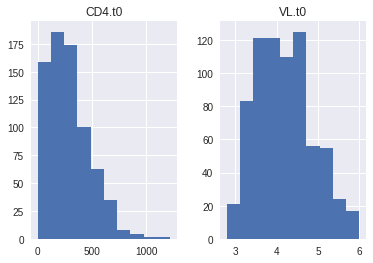

In [19]:
class_0_X[['VL.t0','CD4.t0']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8622b8c518>,
      dtype=object)

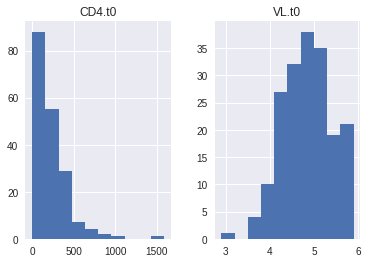

In [20]:
class_1_X[['VL.t0','CD4.t0']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8624c1dba8>,
      dtype=object)

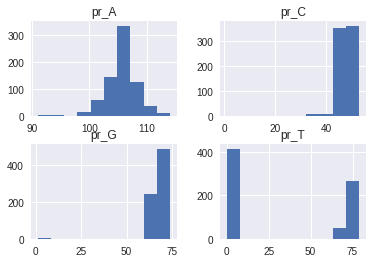

In [21]:
class_0_X[['pr_A', 'pr_C','pr_G', 'pr_T']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8622a78f60>,
      dtype=object)

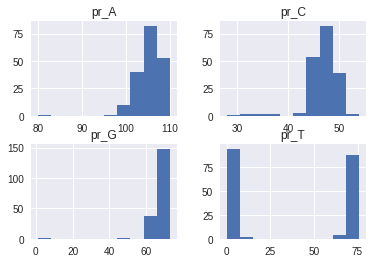

In [22]:
class_1_X[['pr_A', 'pr_C','pr_G', 'pr_T']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86228d9710>,
      dtype=object)

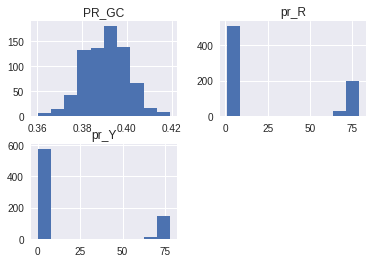

In [23]:
class_0_X[['pr_R','pr_Y','PR_GC']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f862281b2b0>,
      dtype=object)

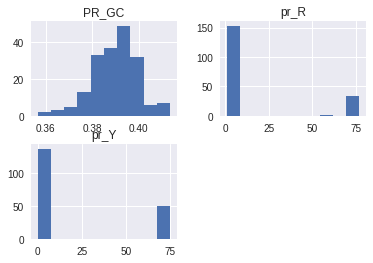

In [24]:
class_1_X[['pr_R','pr_Y','PR_GC']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f862277b358>]],
      dtype=object)

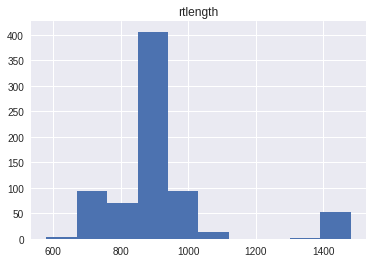

In [25]:
class_0_X[['rtlength']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f862274cc88>]],
      dtype=object)

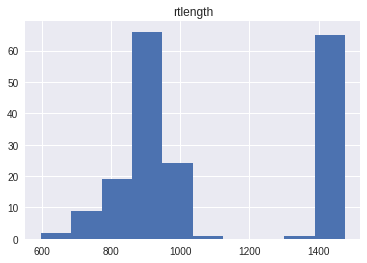

In [26]:
class_1_X[['rtlength']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86227112e8>,
      dtype=object)

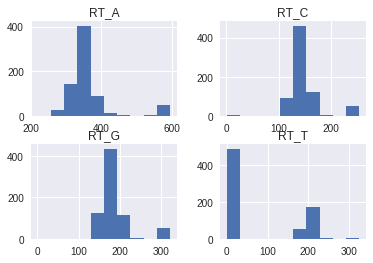

In [27]:
class_0_X[['RT_A', 'RT_C', 'RT_G', 'RT_T']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86225e69b0>,
      dtype=object)

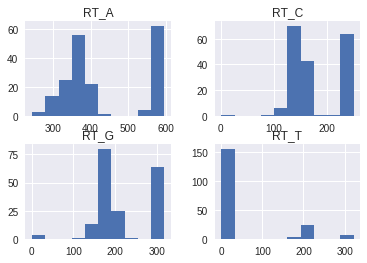

In [28]:
class_1_X[['RT_A', 'RT_C', 'RT_G', 'RT_T']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8622576b70>,
      dtype=object)

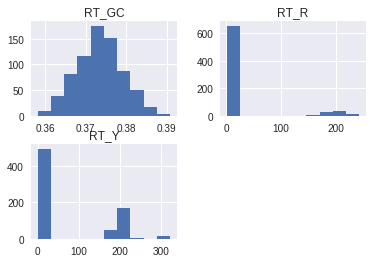

In [29]:
class_0_X[['RT_R', 'RT_Y', 'RT_GC']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8622426a20>,
      dtype=object)

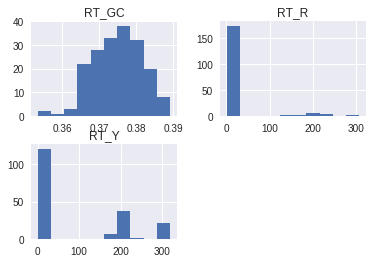

In [30]:
class_1_X[['RT_R', 'RT_Y', 'RT_GC']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8622375fd0>,
      dtype=object)

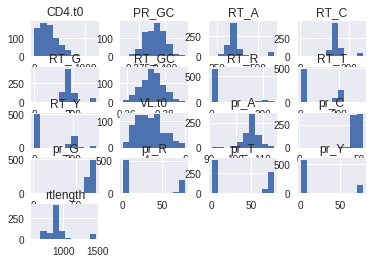

In [31]:
class_0_X.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8621fdf5f8>,
      dtype=object)

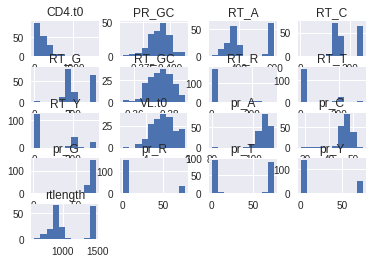

In [32]:
class_1_X.hist()

## Plotting

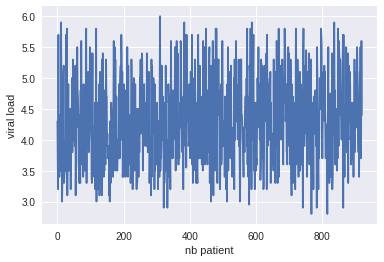

In [33]:
##############  plotting of viral load "VL-t0" #################
data['VL.t0'].plot()
plt.xlabel("nb patient")
plt.ylabel("viral load")

######  save figure, format '.png'
plt.savefig('viral_load_plot.png')

Text(0.5, 0, 'viral load')

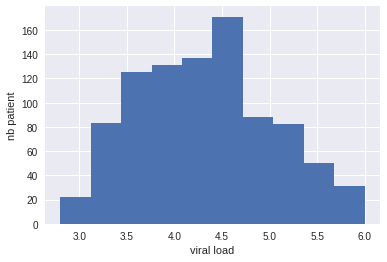

In [34]:
##############  histogramm of viral load "VL-t0" #################
data['VL.t0'].hist()
plt.ylabel("nb patient")
plt.xlabel("viral load")

Text(0, 0.5, 'CD4+ count')

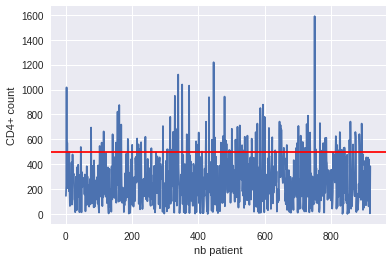

In [35]:
##############  plotting of absolute CD4 count "CD4-t0" #################
data['CD4.t0'].plot()
plt.axhline(500, 0, 1002, color='r')
plt.xlabel("nb patient")
plt.ylabel("CD4+ count")

Text(0.5, 0, 'CD4+ count')

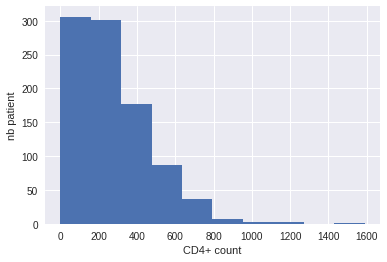

In [36]:
##############  Histogram of absolute CD4 count "CD4-t0" #################
data['CD4.t0'].hist()
plt.ylabel("nb patient")
plt.xlabel("CD4+ count")

Text(0.5, 0, 'improve 1 or not 0')

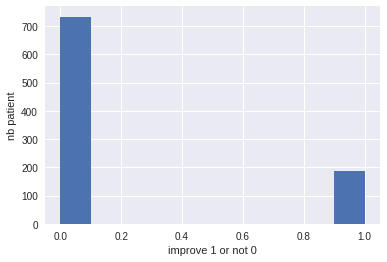

In [37]:
##############  Histogram of improving '1' of responds after 16 weeks of therapy #################
data['Resp'].hist()
plt.ylabel("nb patient")
plt.xlabel("improve 1 or not 0")

# We have imbalanced data

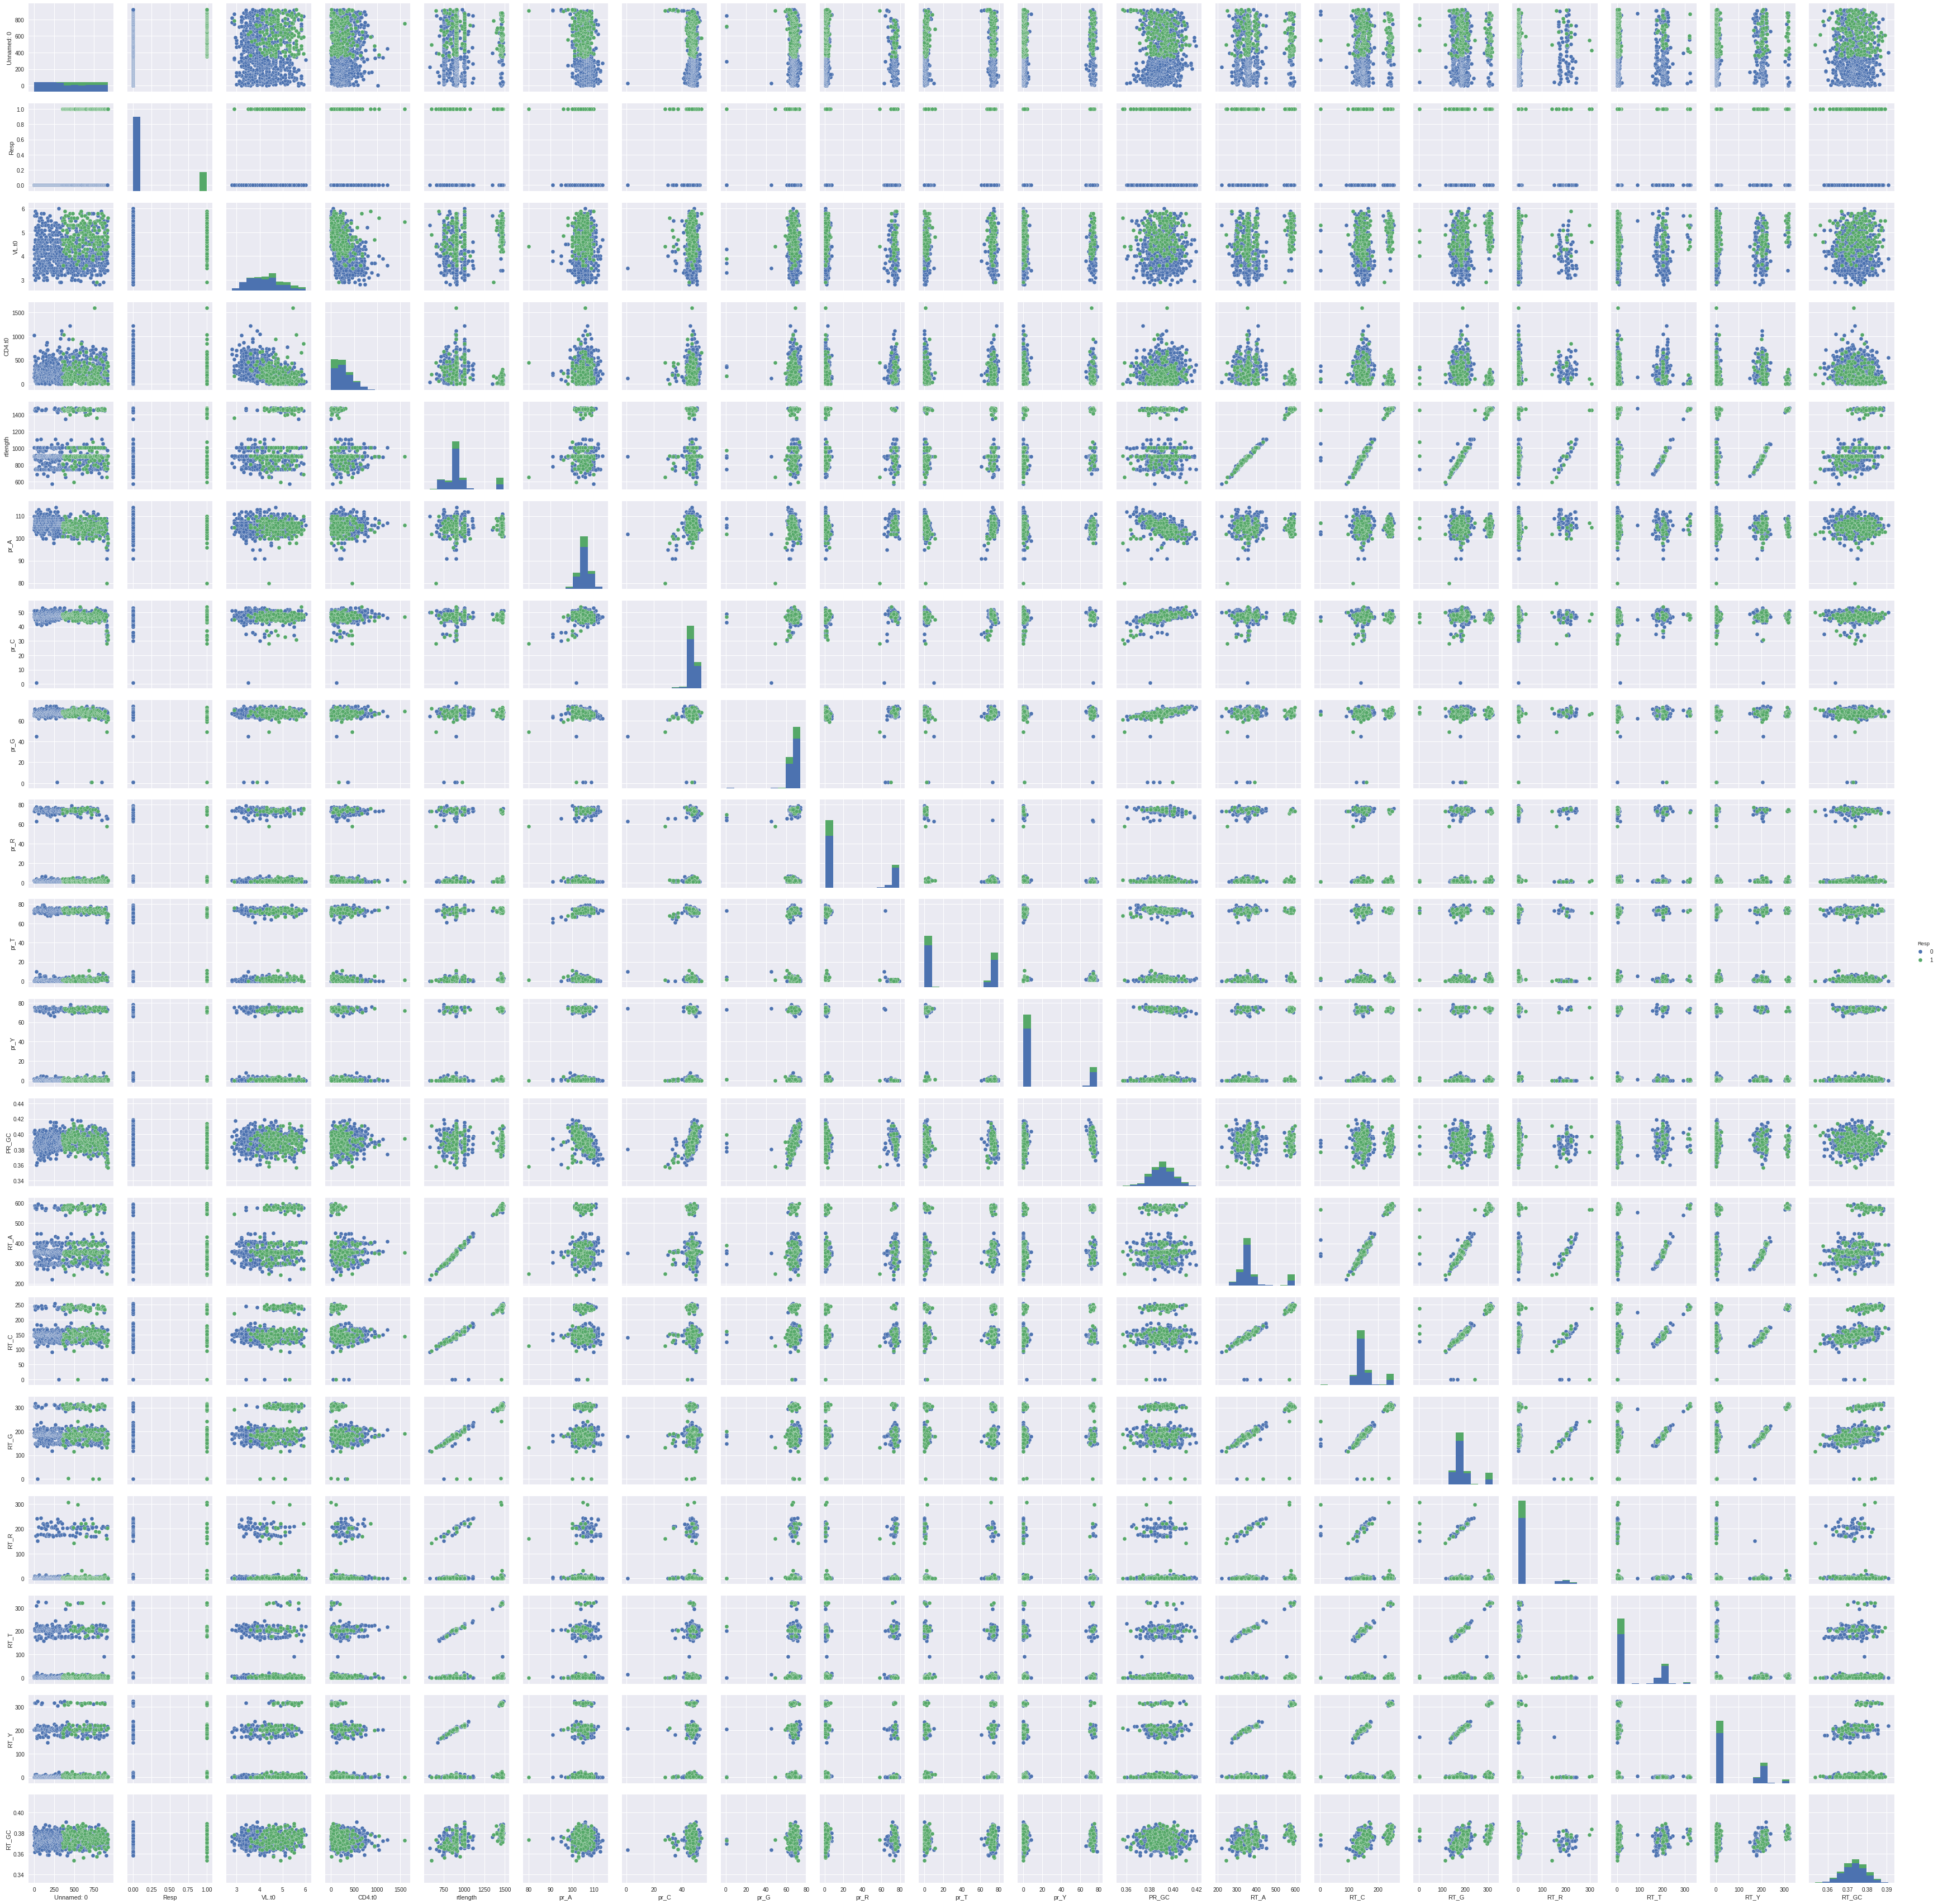

In [38]:
sns.pairplot(data, hue='Resp')

In [39]:
#data[['Resp','VL.t0','CD4.t0', 'pr_A', 'pr_C','pr_G', 'pr_R', 'pr_T','pr_Y','PR_GC']]

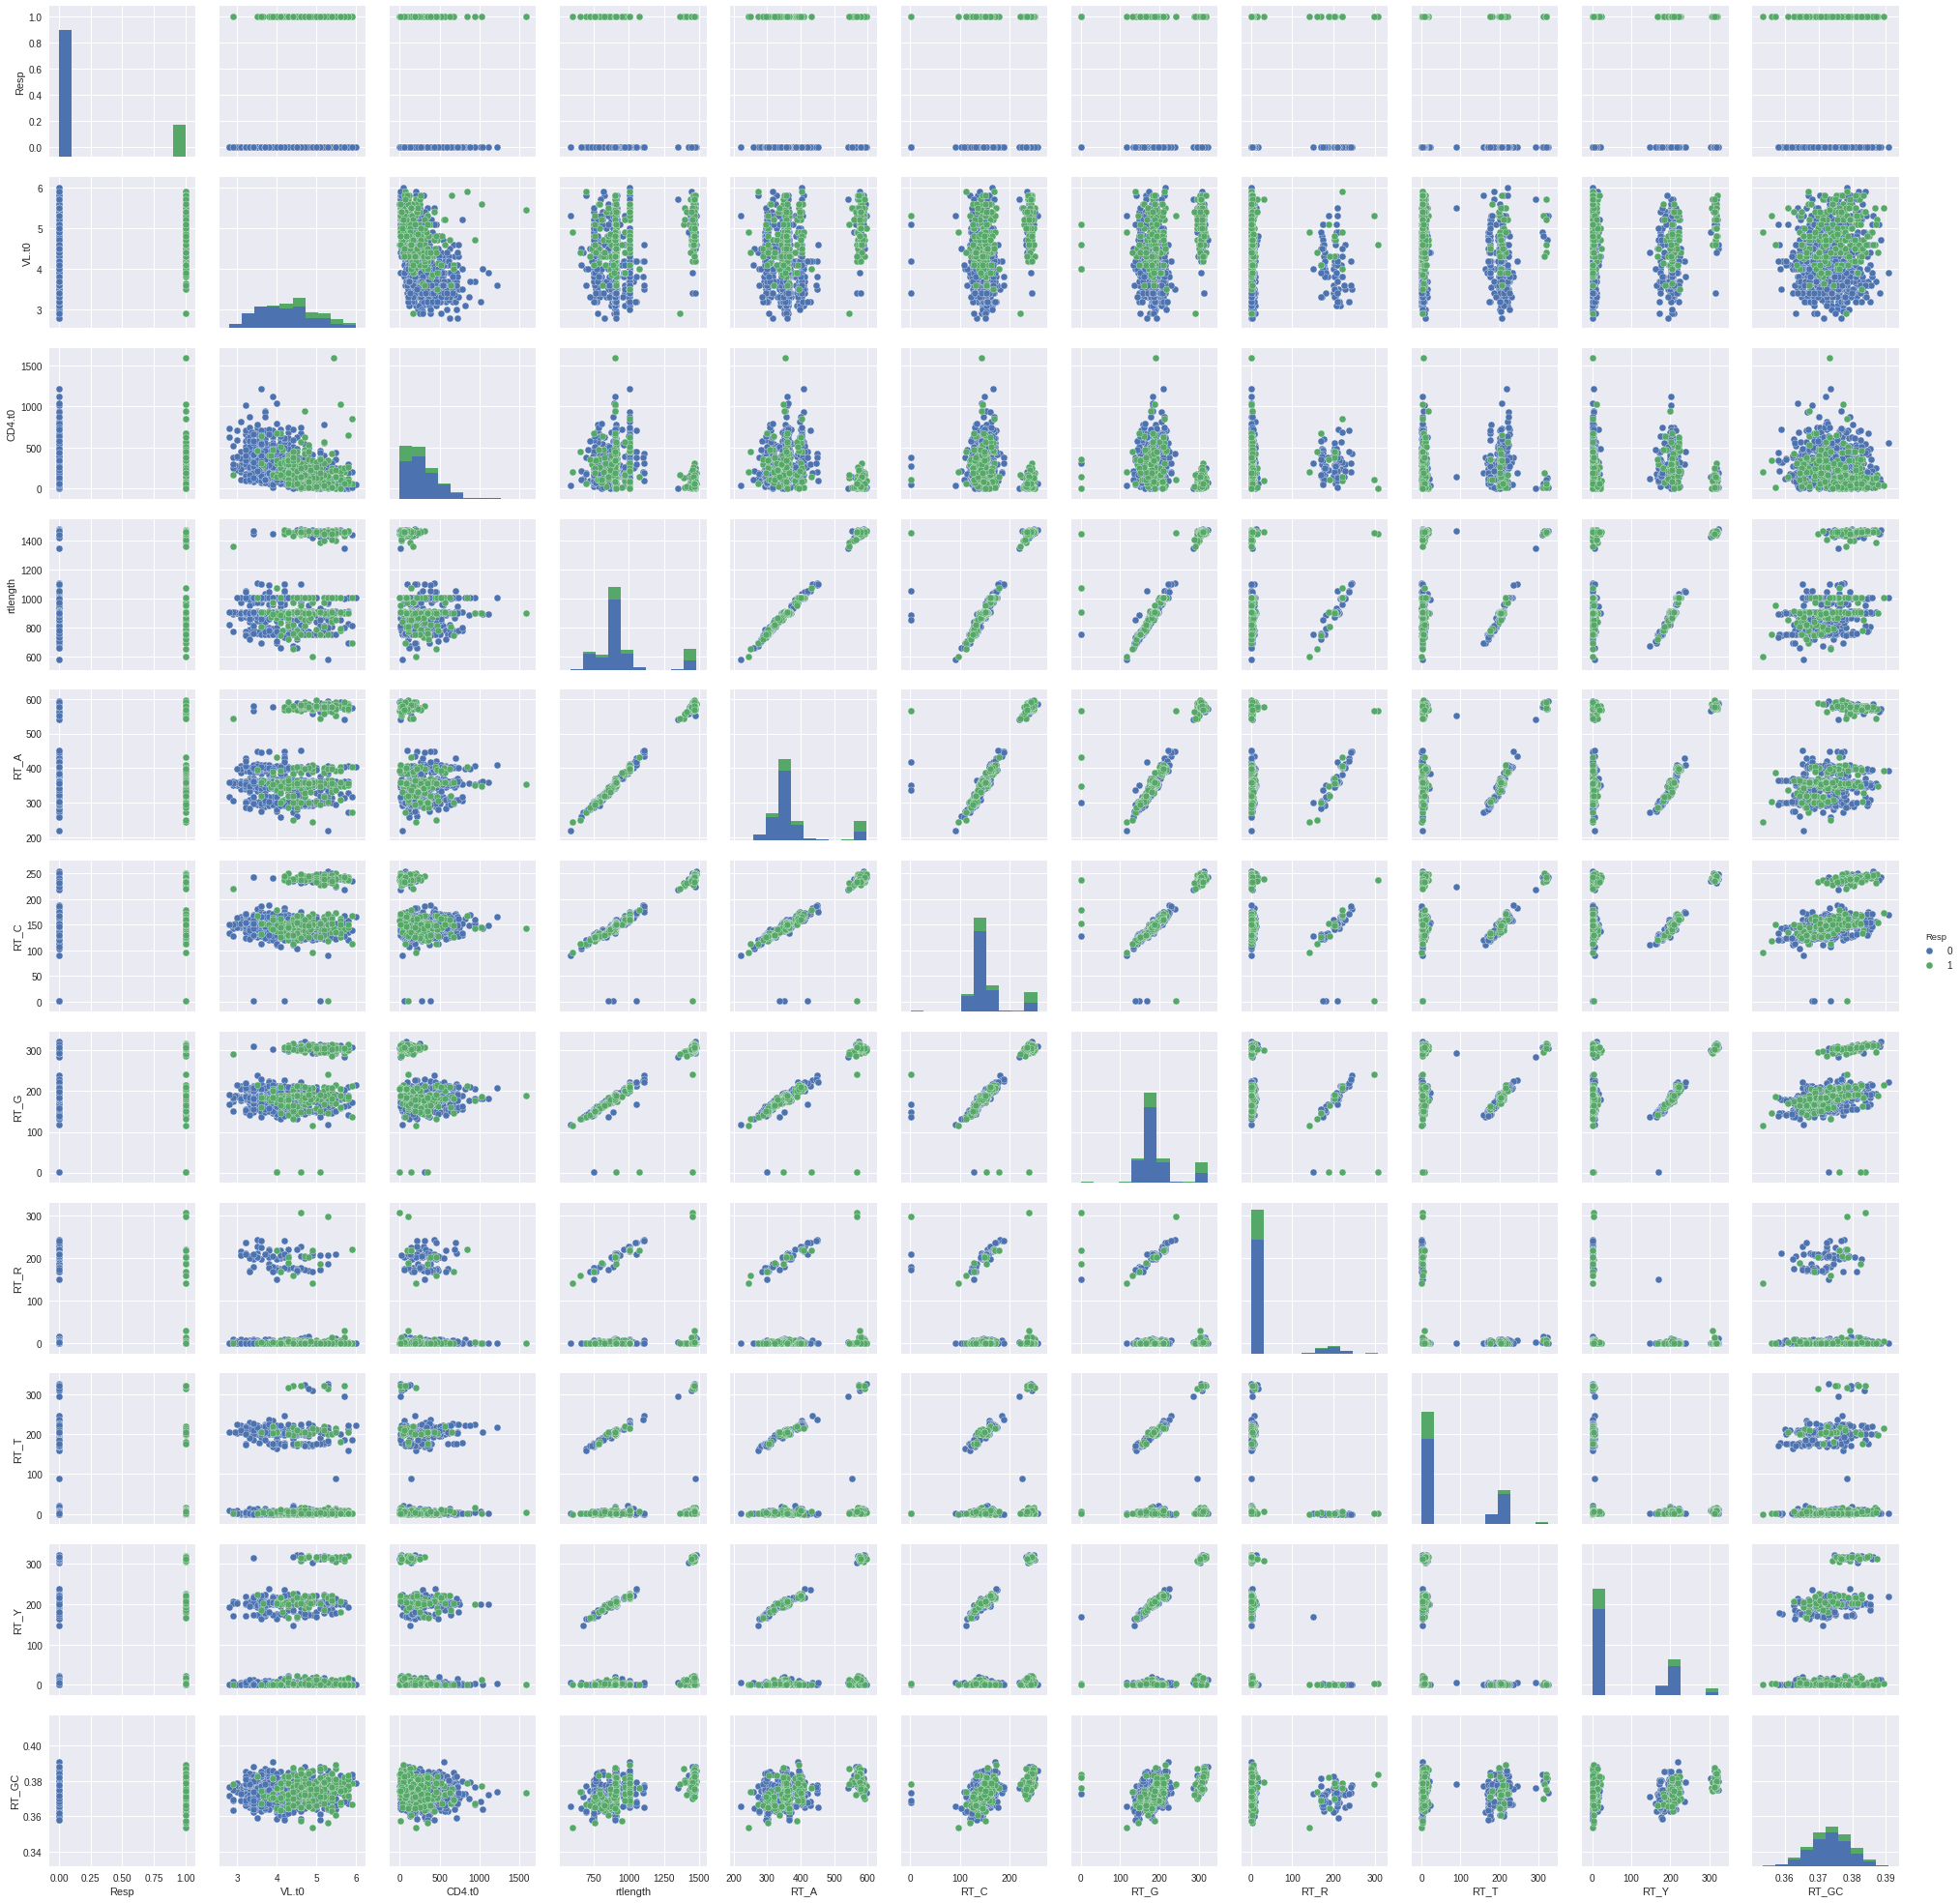

In [40]:
sns.pairplot(data[['Resp','VL.t0','CD4.t0', 'rtlength','RT_A', 'RT_C', 
                  'RT_G', 'RT_R', 'RT_T', 'RT_Y', 'RT_GC']], hue='Resp')

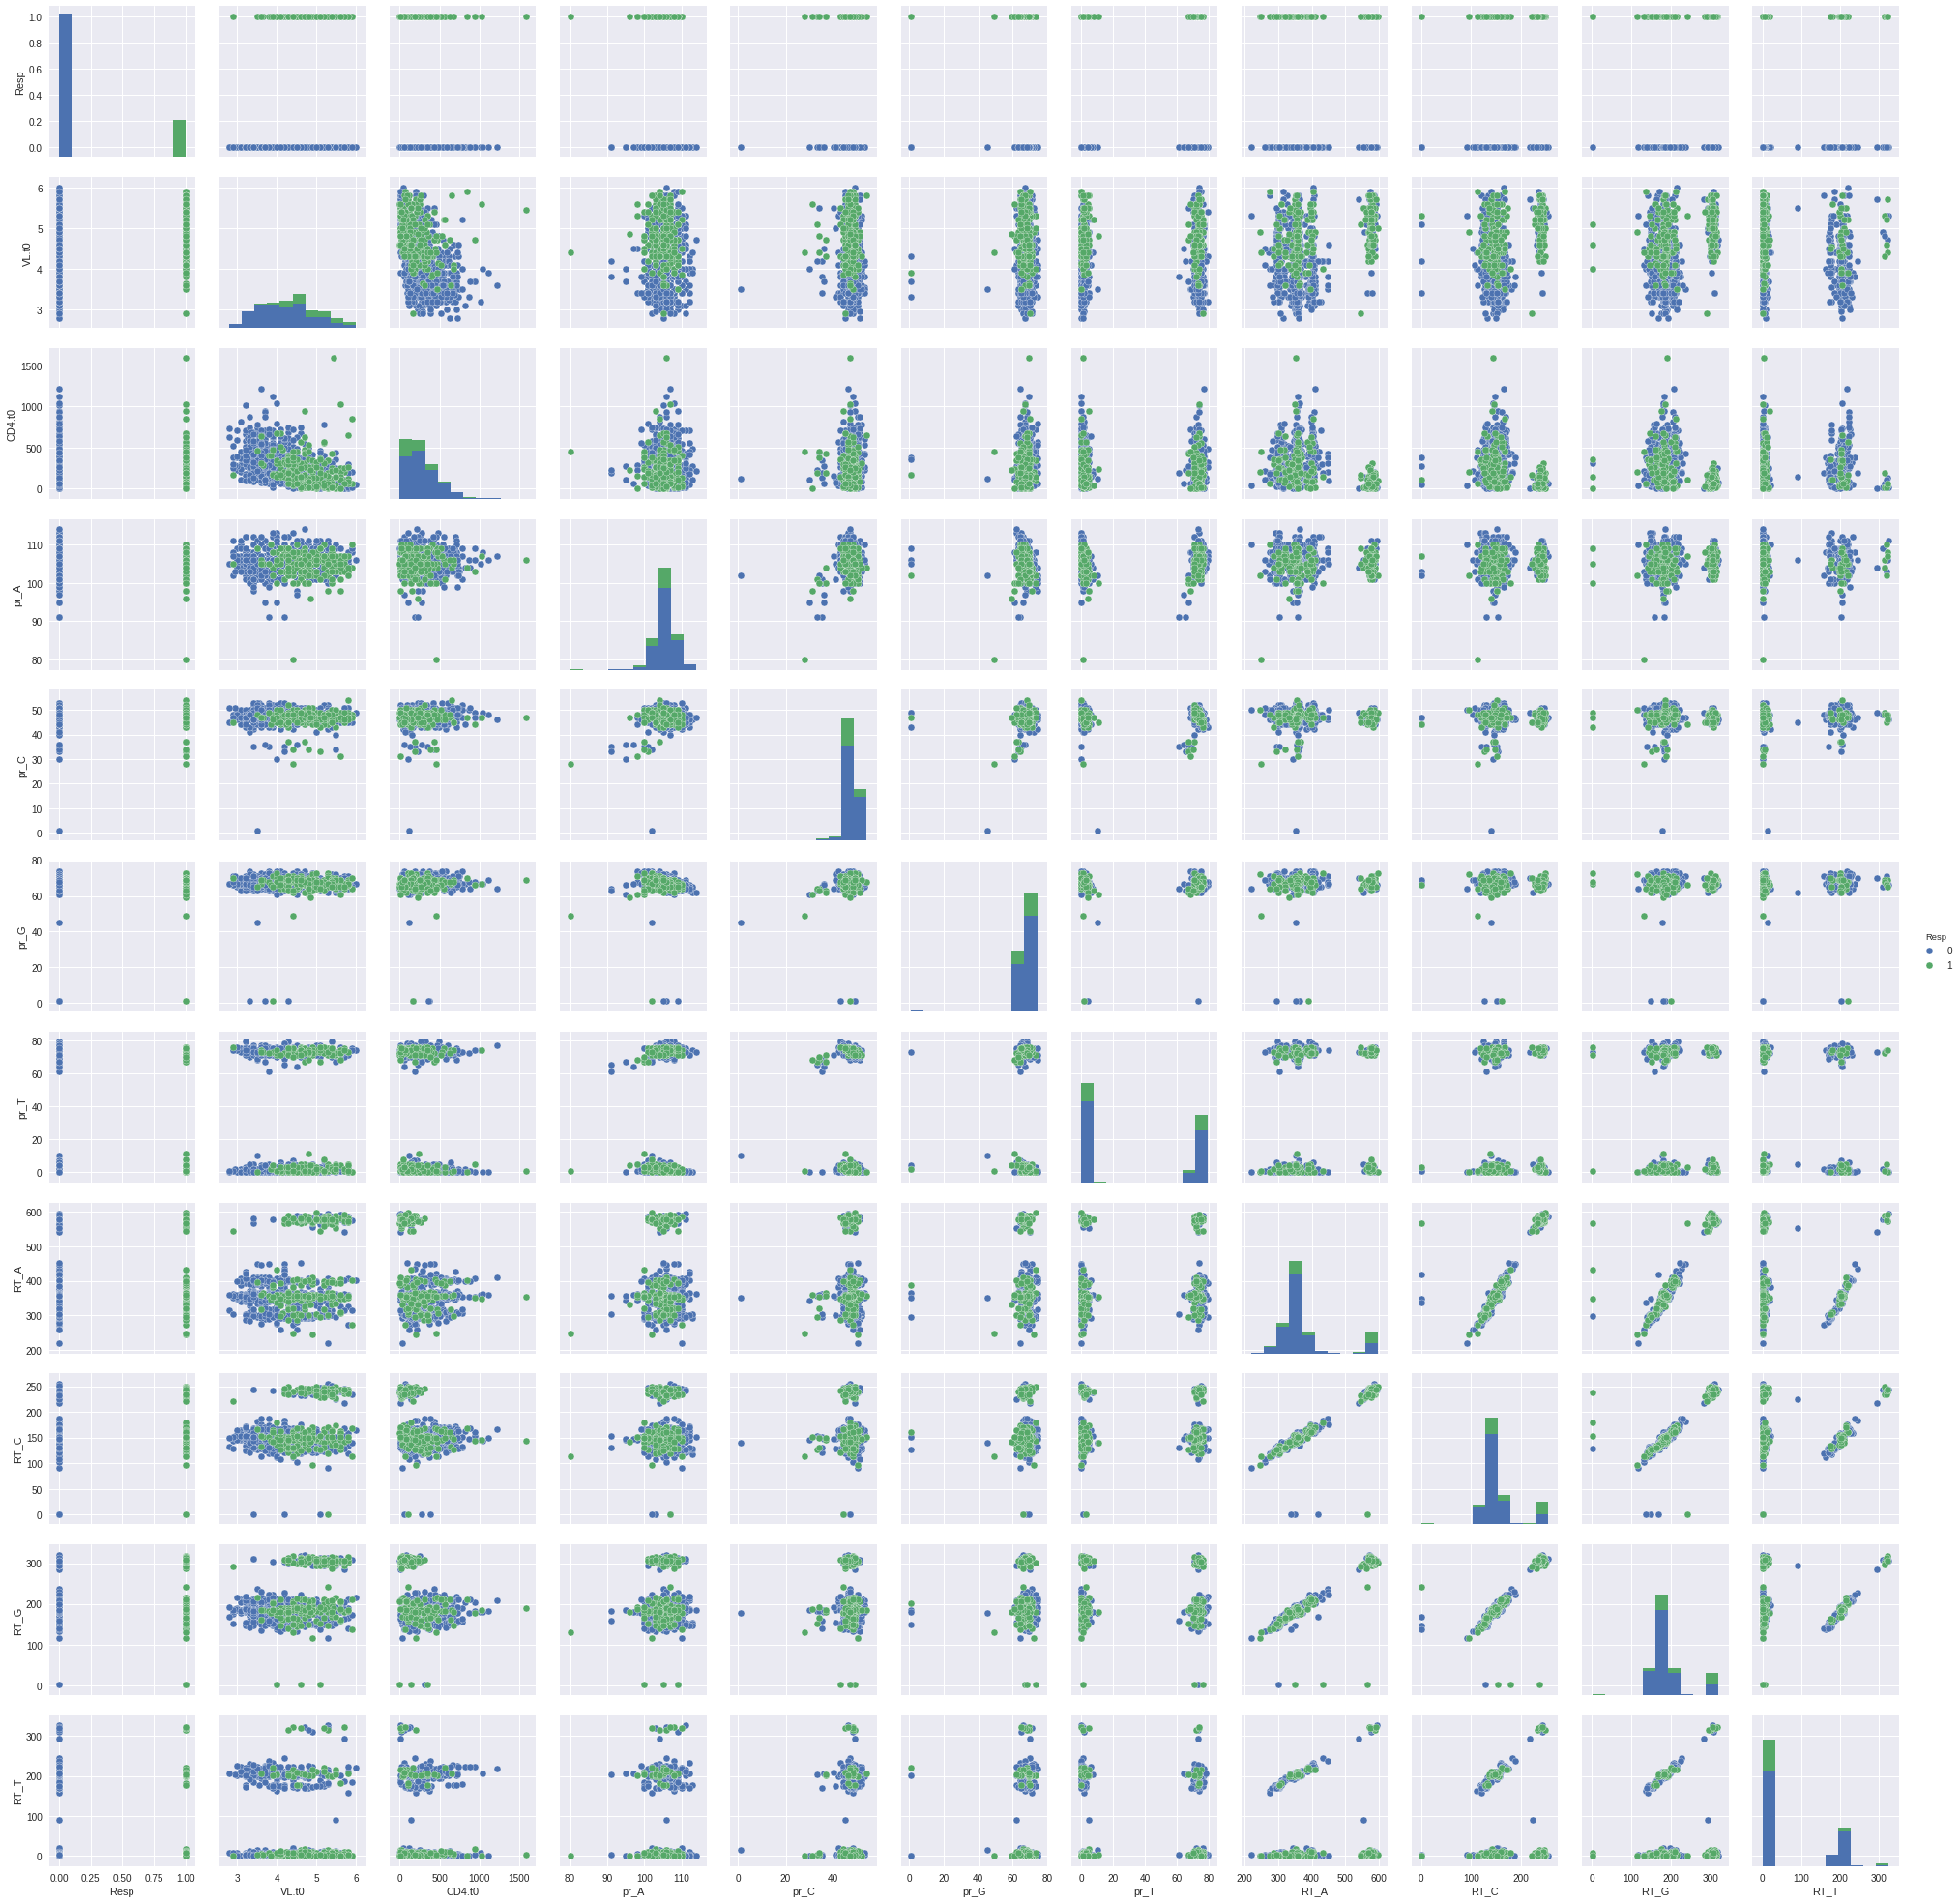

In [41]:
sns.pairplot(data[['Resp','VL.t0','CD4.t0', 'pr_A', 'pr_C','pr_G', 'pr_T','RT_A', 'RT_C', 
                  'RT_G', 'RT_T']], hue='Resp')

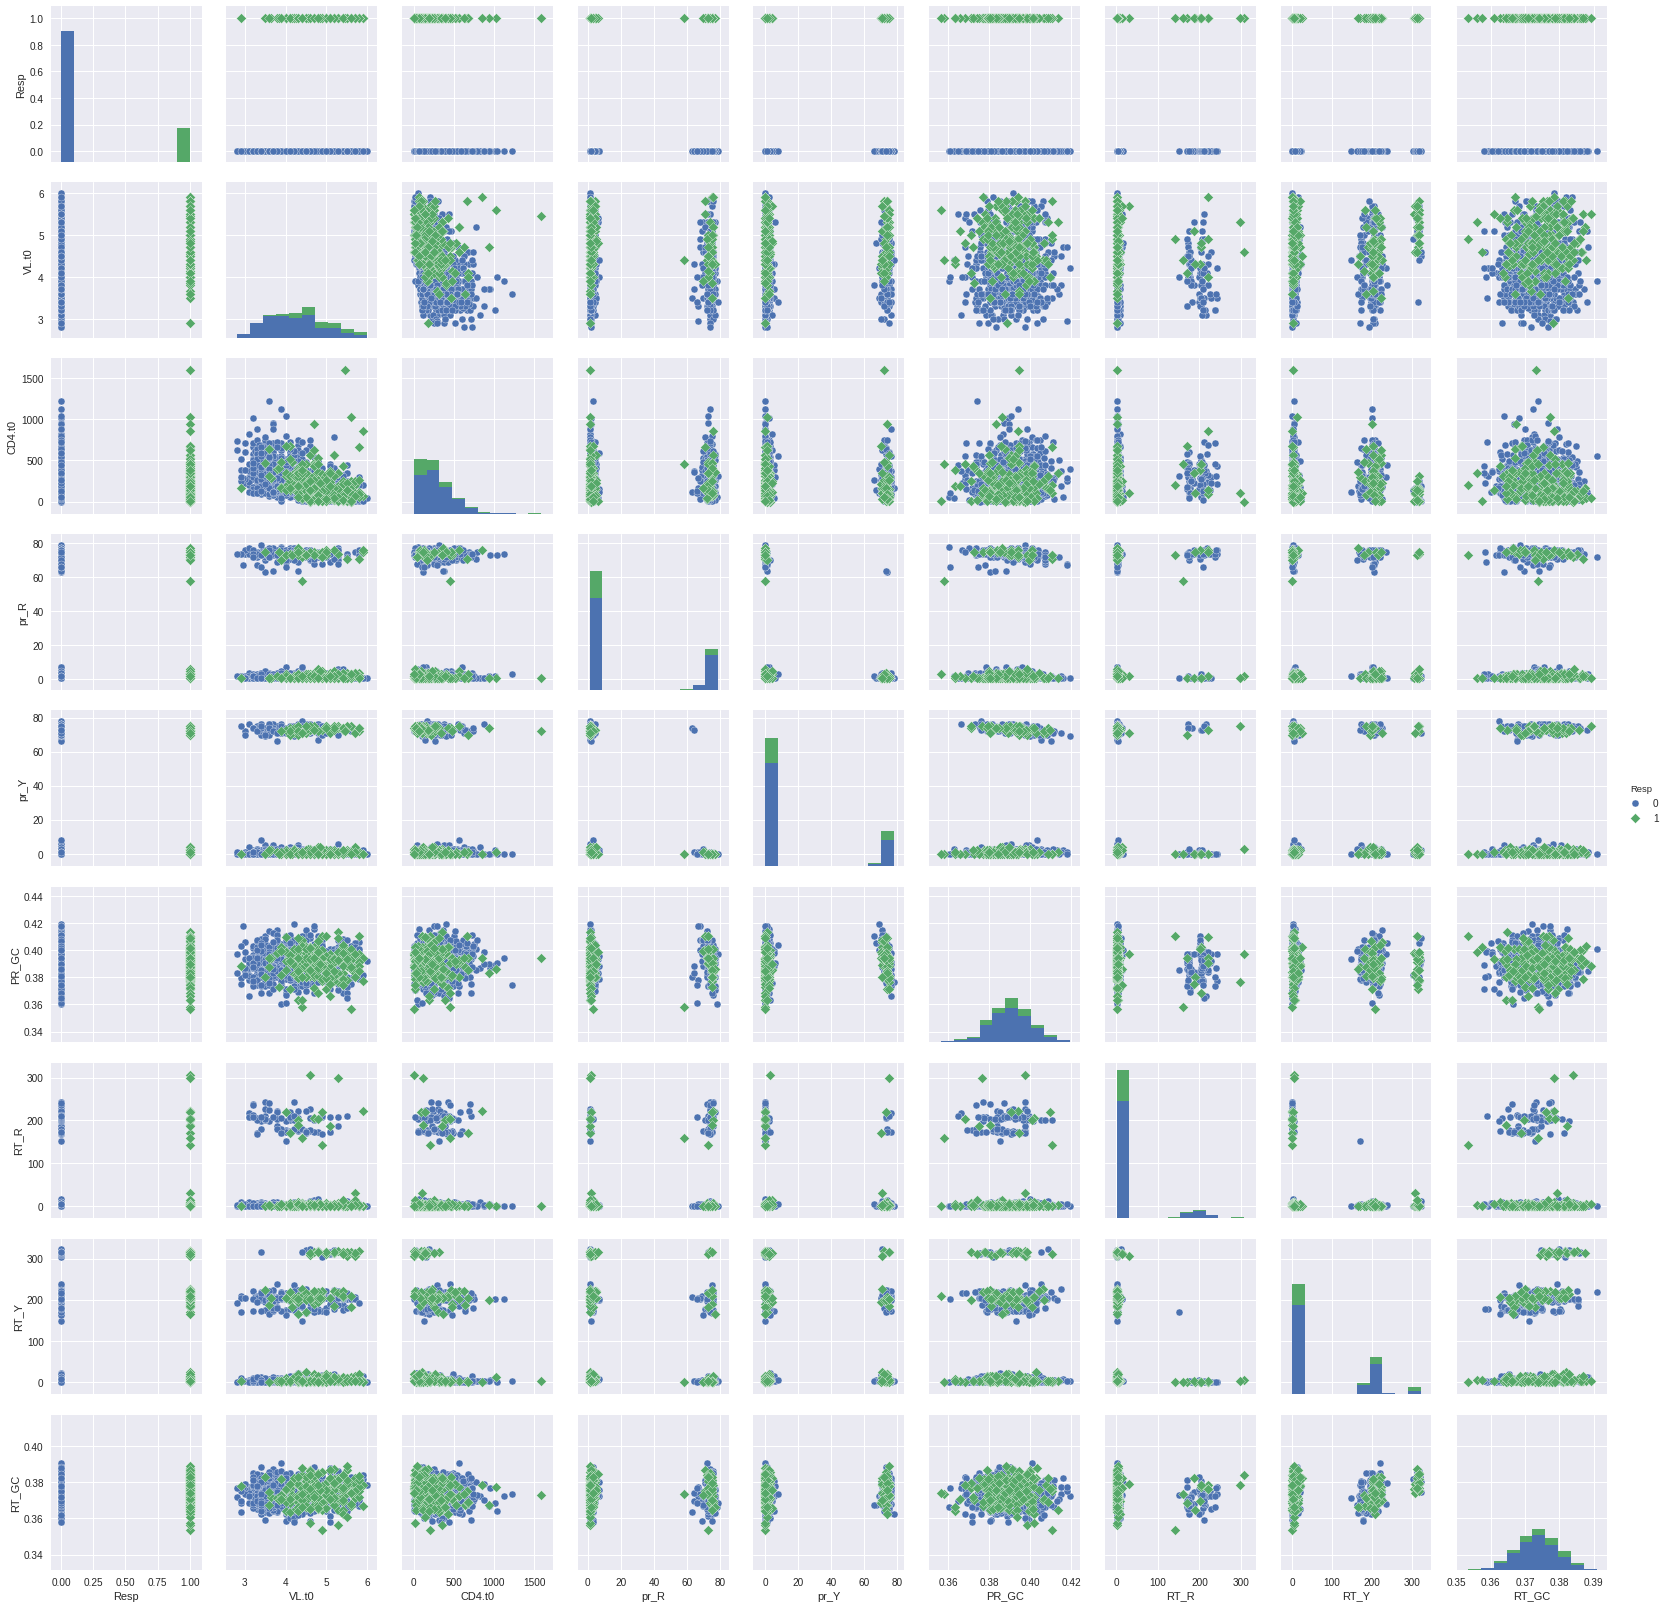

In [42]:
sns.pairplot(data[['Resp','VL.t0','CD4.t0', 'pr_R', 'pr_Y','PR_GC', 'RT_R', 'RT_Y', 'RT_GC']], hue='Resp', markers=["o", "D"])

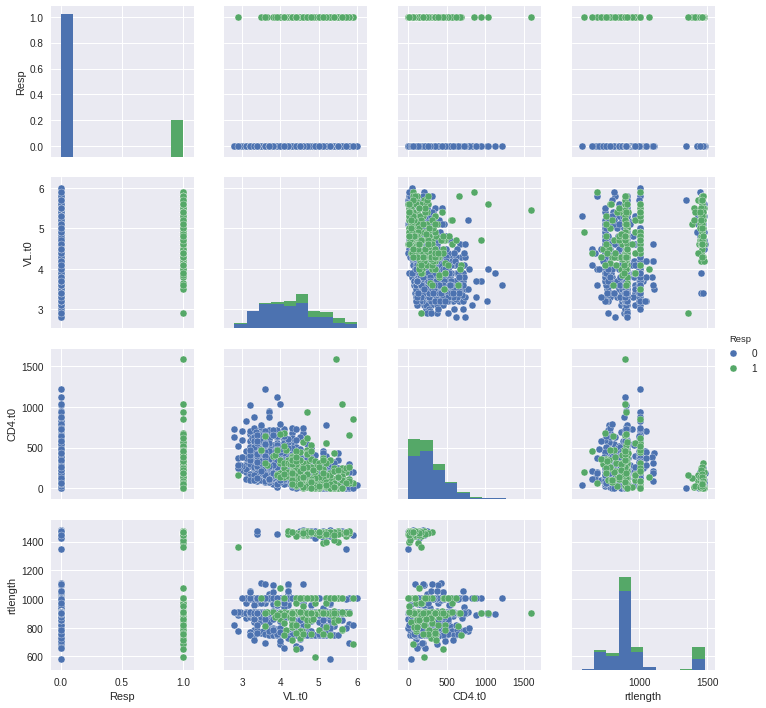

In [43]:
sns.pairplot(data[['Resp','VL.t0','CD4.t0', 'rtlength']], hue='Resp')

/home/awa/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


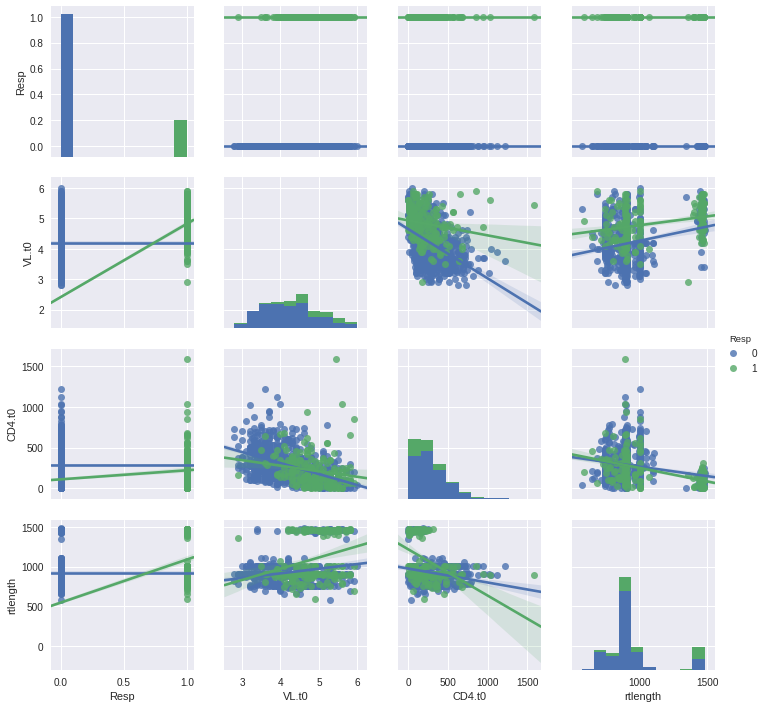

In [44]:
sns.pairplot(data[['Resp','VL.t0','CD4.t0', 'rtlength']], hue='Resp', kind='reg')

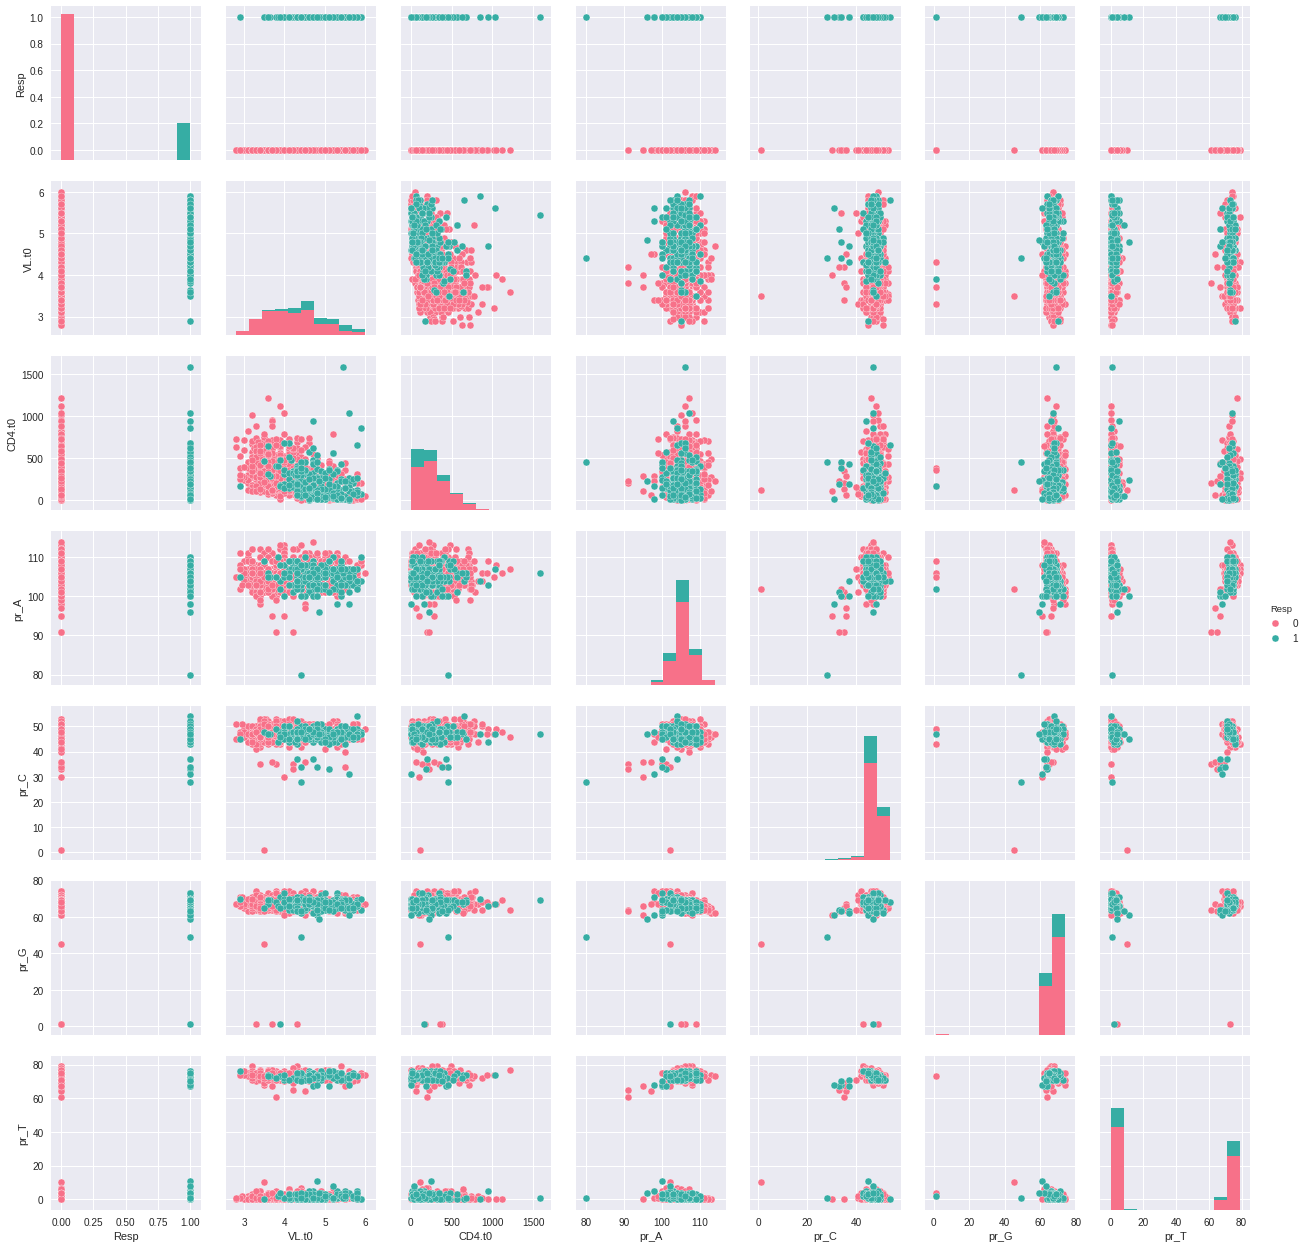

In [45]:
sns.pairplot(data[['Resp','VL.t0','CD4.t0', 'pr_A', 'pr_C','pr_G','pr_T']], hue='Resp', palette="husl")

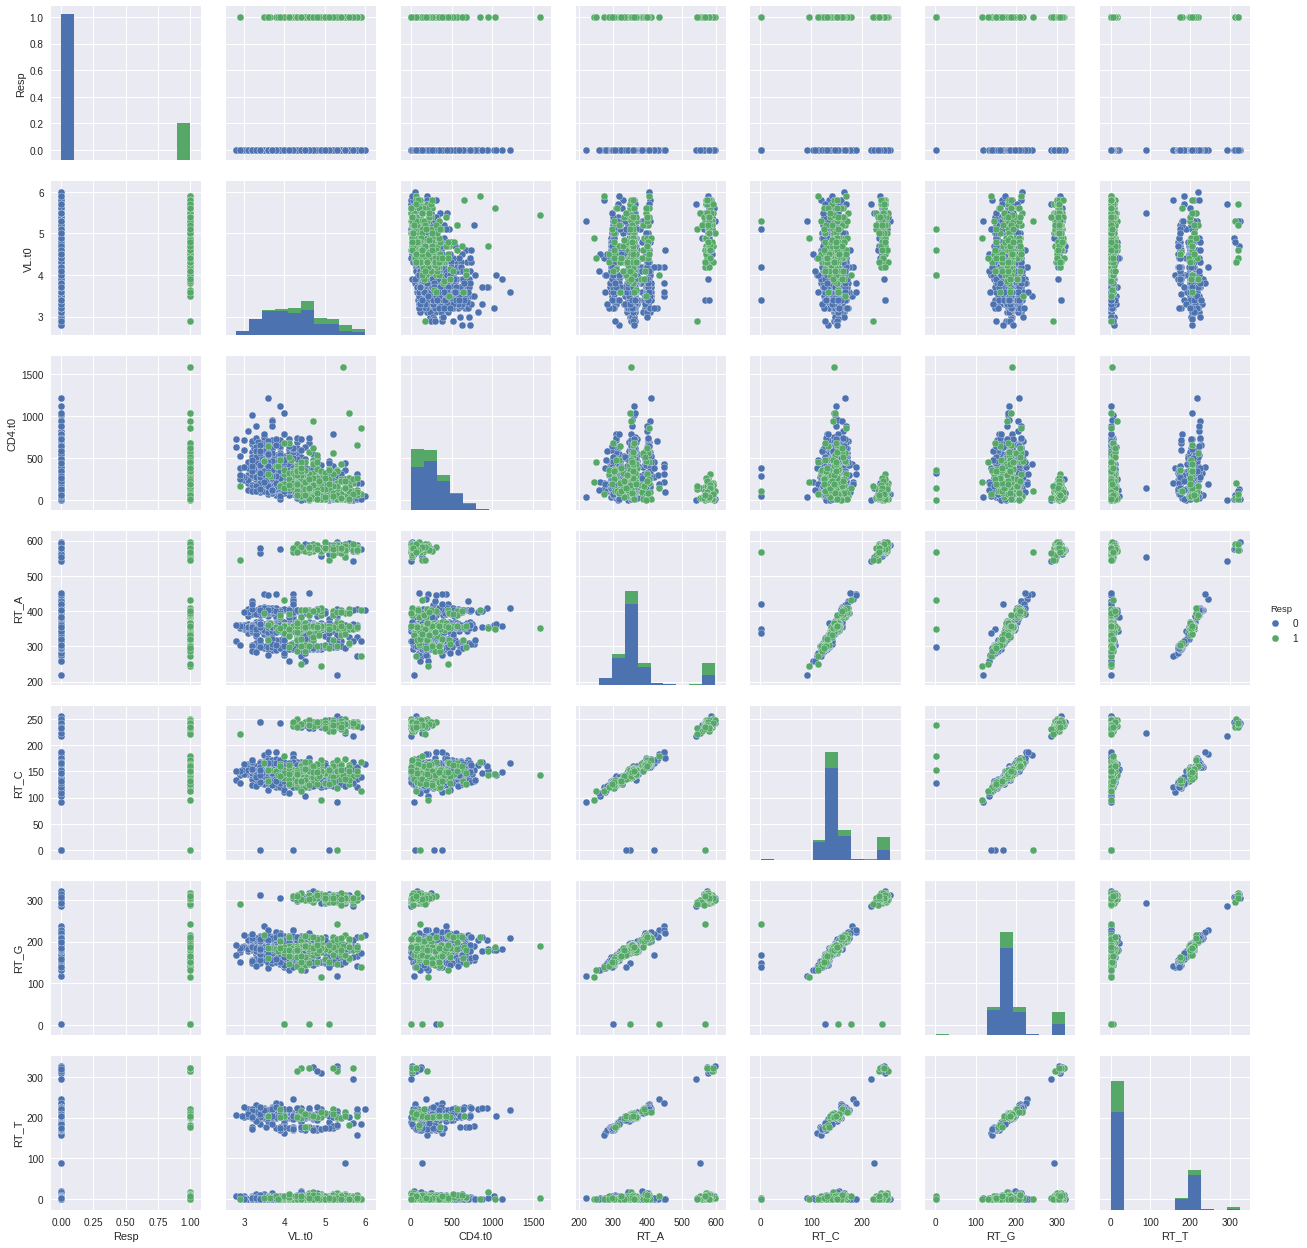

In [46]:
sns.pairplot(data[['Resp','VL.t0','CD4.t0', 'RT_A', 'RT_C', 
                  'RT_G', 'RT_T']], hue='Resp')

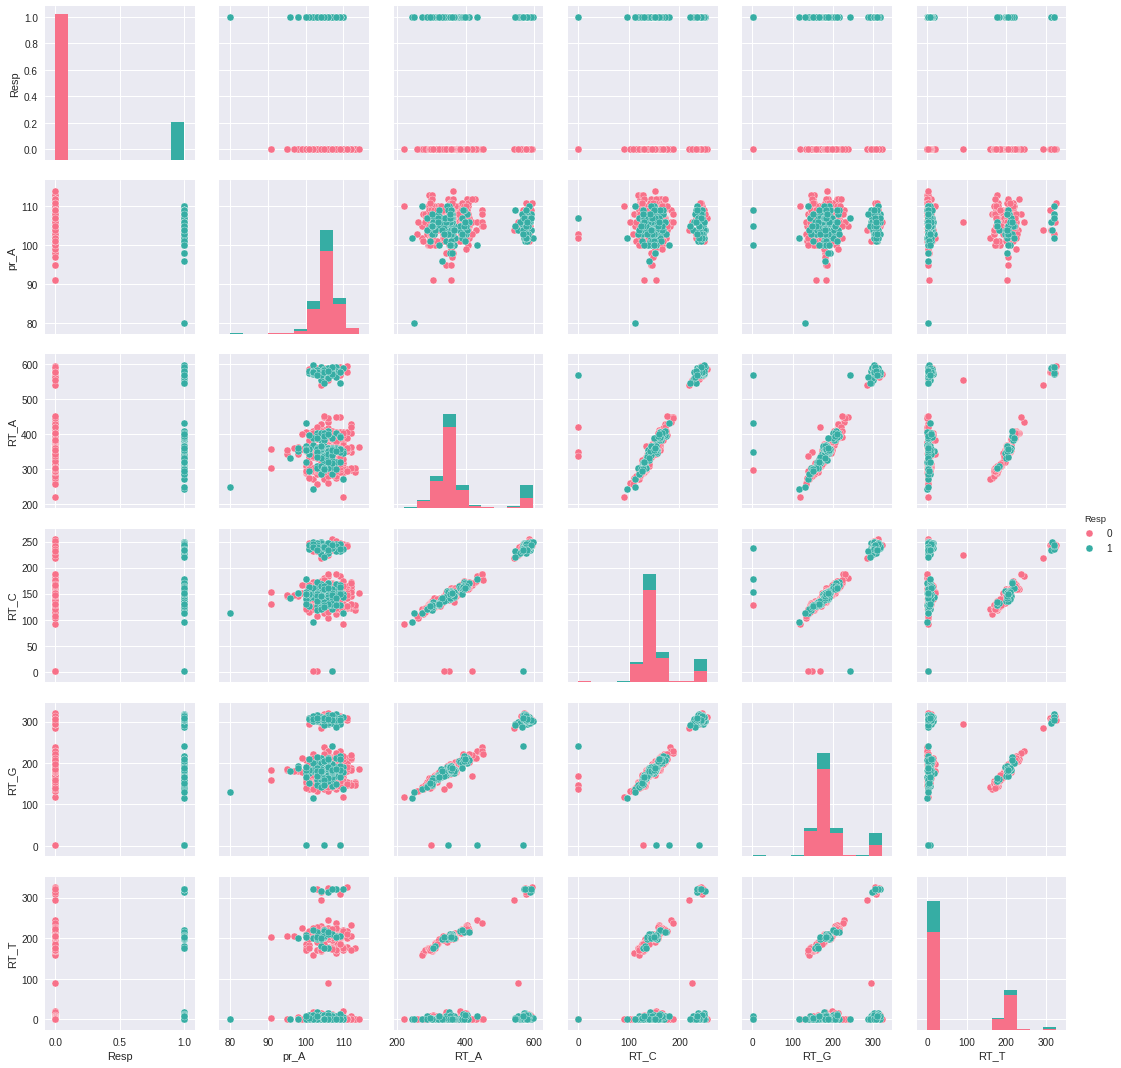

In [47]:
sns.pairplot(data[['Resp','pr_A', 'RT_A', 'RT_C', 
                  'RT_G', 'RT_T']], hue='Resp', palette="husl")

/home/awa/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


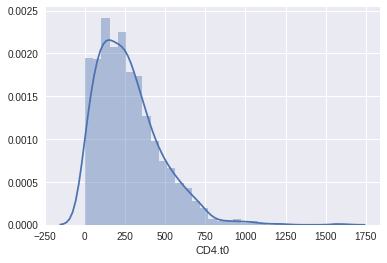

In [48]:
sns.distplot(data['CD4.t0'])